In [240]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature

import tensorflow.keras as keras
import tensorflow as tf
# training data
trnImages = np.load('trnImage.npy')
trnLabel = np.load('trnLabel.npy')
# testing data
tstImages = np.load('tstImage.npy')
tstLabel = np.load('tstLabel.npy')

# singe image example
# trnidx = 20
# trnLabel[trnidx]
# trnImages.shape

In [241]:
# plt.imshow(trnImages[:,:,:,trnidx])

In [242]:
def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image

In [243]:
# Extract the features from a single image
# features, hog_image = computeFeatures(trnImages[:,:,:,trnidx])

# plt.imshow(hog_image)
# plt.show(block=False)

In [244]:
# creates trndata of features from all train images.
trndatalist = []
for i in range(10000):
    features, hog_image = computeFeatures(trnImages[:,:,:,i])
    trndatalist.append(features)
trndata = np.array(trndatalist)    

In [245]:
# trndata.shape

In [189]:
# creates tstdata of features from all test images.
tstdatalist = []
for j in range(1000):
    features, hog_image = computeFeatures(tstImages[:,:,:,j])
    tstdatalist.append(features)
tstdata = np.array(tstdatalist) 

In [246]:
# tstdata.shape[1]
# tstLabel.shape

In [305]:
# Build a network architecture.
model = keras.Sequential()

# Create input, hidden and output layers
model.add(keras.layers.InputLayer(input_shape=(tstdata.shape[1],)))
model.add(keras.layers.Dense(648, activation='sigmoid')) 
# model.add(keras.layers.Dense(324, activation='sigmoid')) 
# model.add(keras.layers.Dense(32, activation='sigmoid'))
model.add(keras.layers.Dense(11, activation='softmax'))

# Generate a callable keras Model, fit and predict data
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['acc'])
history = model.fit(trndata, trnLabel, validation_data=(tstdata, tstLabel), epochs=1000, verbose=0)
predicted_probabilities = model.predict(tstdata)
predicted_labels = np.argmax(predicted_probabilities, axis=1)


In [306]:
# model.summary()
# AVG Precentage accuracy rate %
x, y = model.evaluate(tstdata, tstLabel)
y*100

1000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

52.10000276565552

Text(0.5, 0, 'Epoch')

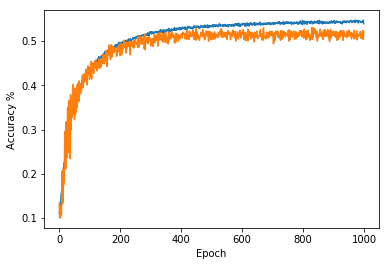

In [307]:
# Plot the training curves for model accuracy
plt.figure()
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.ylabel('Accuracy %')
plt.xlabel('Epoch')


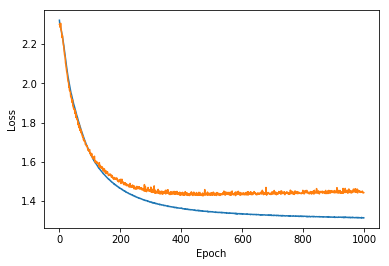

In [308]:
# Plot the training curves for the model's loss
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [309]:
# predicted_labels
# predicted_probabilities.shape

In [310]:
# Precentage accuracy rate % for each category:
# 1
model.evaluate(tstdata[:100], tstLabel[:100])
# 2
model.evaluate(tstdata[100:200], tstLabel[100:200])
# 3
model.evaluate(tstdata[200:300], tstLabel[200:300])
# 4
model.evaluate(tstdata[300:400], tstLabel[300:400])
# 5
model.evaluate(tstdata[400:500], tstLabel[400:500])
# 6
model.evaluate(tstdata[500:600], tstLabel[500:600])
# 7
model.evaluate(tstdata[600:700], tstLabel[600:700])
# 8
model.evaluate(tstdata[700:800], tstLabel[700:800])
# 9
model.evaluate(tstdata[800:900], tstLabel[800:900])
# 10
model.evaluate(tstdata[900:1000], tstLabel[900:1000])

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[1.327102222442627, 0.61]